## Linear Regression



Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable. You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png">

In this section, we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form

$$y=\beta_0+\beta_1x$$
 
where $\beta_1$ is commonly known as the slope, and $\beta_0$ is commonly known as the intercept.
Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

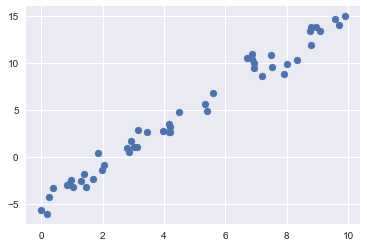

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

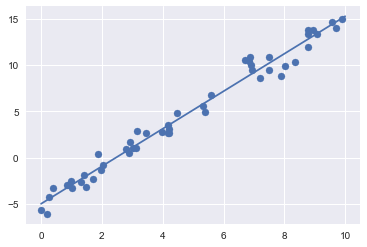

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are ``coef_`` and ``intercept_``:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

## Predict new value

Using ``predict`` method, we can estimate the new response value

In [5]:
# predict for a new observation
X_new = np.array([[2.5]])
model.predict(X_new)

array([0.06944494])

## Statmodels for Linear Regression

Linear models with independently and identically distributed errors, and for errors with heteroscedasticity or autocorrelation. This module allows estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.

C:\Users\A1825\AppData\Local\Continuum\anaconda3\envs\ubaru\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     299.8
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.59e-22
Time:                        16:32:31   Log-Likelihood:                -123.85
No. Observations:                  50   AIC:                             249.7
Df Residuals:                      49   BIC:                             251.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2773      0.074     17.315      0.000       1.129       1.426
==============================================================================
Omnibus:                        8.013   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                2.657
Skew:                           0.135   Prob(JB):                        0.265
Kurtosis:                       1.903   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

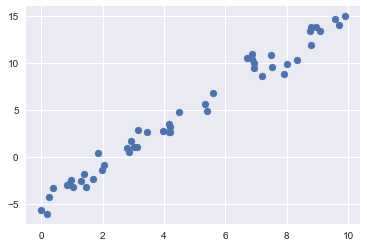

In [6]:
import statsmodels.api as sm
# from pandas.core import datetools

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x,y);

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()


The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

### Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. The idea is to take our multidimensional linear model:

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$
 
and build the $x_1$, $x_2$, $x_3$ and so on, from our single-dimensional input $x$. That is, we let  $x_n=f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if  $f_n(x)=x_n$ , our model becomes a polynomial regression:

$$y=\beta_0+\beta_1x_1+\beta_2x^2+\beta_3x^3⋯+\beta_nx^n$$
 
Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [8]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

By using the scikit-learn's [``pipeline``](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), we can make a 7th-degree polynomial model

In [9]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression()) #more degree will cause to overfitting

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. For example, here is a sine wave with noise:

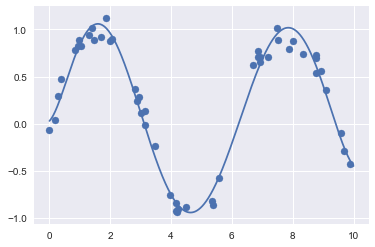

In [10]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### Exercise

Read the csv data from http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv where

The features are:
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

and the response is:
- Sales: sales of a single product in a given market (in thousands of widgets)

Explore the data and find out the answers for the following questions:
- Is there a relationship between ads and sales?
- How strong is that relationship?
- Which ad types contribute to sales?
- What is the effect of each ad type of sales?
- Given ad spending in a particular market, can sales be predicted?

In [11]:
# read data into a DataFrame
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Linear Regression

Develop a simple LinearRegression for each feature i.e. TV, Radio, Newspaper against Sales.

[0.04753664]
7.032593549127693


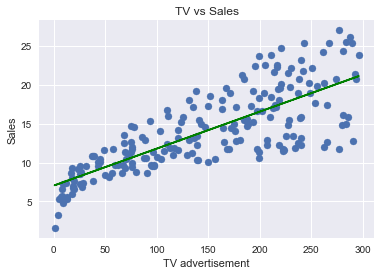

In [12]:
## TV vs Sales
# from sklearn.linear_model import LinearRegression
# TVmodel = LinearRegression(fit_intercept=True)

# Xfit = TVmodel.fit(data.TV[:,np.newaxis], data.Sales)

# yfit = TVmodel.predict(Xfit)

# plt.scatter(data.TV, data.Sales)
# plt.plot(Xfit, yfit, color='red');

from sklearn.linear_model import LinearRegression
TVmodel = LinearRegression(fit_intercept=True)
TVmodel.fit(data.TV[:,np.newaxis],data.sales)
TVfit = TVmodel.predict(data.TV[:,np.newaxis])

plt.scatter(data.TV, data.sales)
plt.plot(data.TV, TVfit, color='green')
plt.xlabel('TV advertisement')
plt.ylabel('Sales')
plt.title('TV vs Sales')

print(TVmodel.coef_)
print(TVmodel.intercept_)



[0.20249578]
9.311638095158283


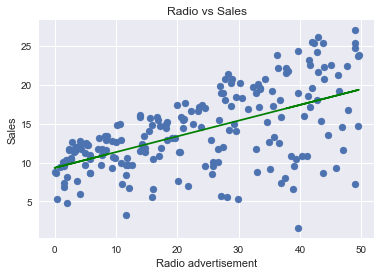

In [13]:
## Radio vs Sales
from sklearn.linear_model import LinearRegression

Radiomodel = LinearRegression(fit_intercept=True)
Radiomodel.fit(data.radio[:,np.newaxis],data.sales)
Radiofit = Radiomodel.predict(data.radio[:,np.newaxis])

plt.scatter(data.radio, data.sales)
plt.plot(data.radio, Radiofit, color='green')
plt.xlabel('Radio advertisement')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

print(Radiomodel.coef_)
print(Radiomodel.intercept_)


[0.0546931]
12.35140706927816


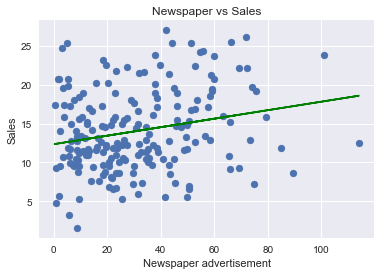

In [14]:
## Newspaper vs Sales

from sklearn.linear_model import LinearRegression
Newspapermodel = LinearRegression(fit_intercept=True)
Newspapermodel.fit(data.newspaper[:,np.newaxis],data.sales)
Newspaperfit = Newspapermodel.predict(data.newspaper[:,np.newaxis])

plt.scatter(data.newspaper, data.sales)
plt.plot(data.newspaper, Newspaperfit, color='green')
plt.xlabel('Newspaper advertisement')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

print(Newspapermodel.coef_)
print(Newspapermodel.intercept_)

### Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$$ y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$$y=\beta_0+\beta_1×TV+\beta_2×Radio+\beta_3×Newspaper$$

In [15]:
## Multiple Linear Regression
from sklearn import linear_model

LR = linear_model.LinearRegression(fit_intercept=True)
LR.fit(data.loc[:,['TV','radio','newspaper']], data.sales)

print('Model coefficients:',LR.coef_)
print('Model intercept:',LR.intercept_)

Model coefficients: [ 0.04576465  0.18853002 -0.00103749]
Model intercept: 2.9388893694594067


Plot the three features vs Sales and also the fitted line

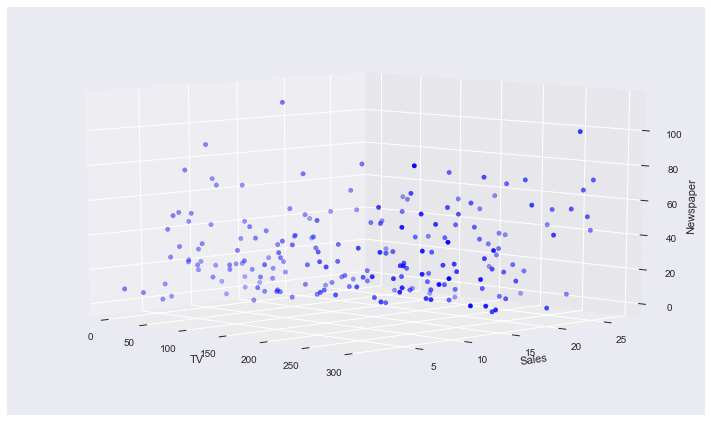

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=data['TV'], ys=data['sales'], zs=data['newspaper'], c=('blue'))

ax.set_ylabel('Sales'); ax.set_xlabel('TV'); ax.set_zlabel('Newspaper')
ax.view_init(10, -45)

## Predict New Observation

Predict the Sales for ddvertisement spending TV=100, Radio=25 and Newspaper=25 respectively.

In [17]:
## Prediction
X_new = np.array([[100,25,25]])
LR.predict(X_new)

array([12.20266701])

## Exercise 2

Load the sklearn dataset of the [Boston house prices](https://archive.ics.uci.edu/ml/datasets/housing) (link to the description). The Boston house prices is a dataset designated for testing and learning machine learning tools, it comes with a description of the dataset. 

Answer the following questions:
- Describe the summary of the data
- Perform multiple linear regression and determine:
    - The $R^2$ value
    - The coefficients and intercept values

In [18]:
# imports datasets from scikit-learn
from sklearn import datasets
import pandas as pd

# loads Boston dataset from datasets library 
data = datasets.load_boston() 

# description of the Boston dataset
print (data.DESCR)

# check the data type of data

print(type(data))

print(data)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [19]:
# define the data/predictors as the pre-set feature names  
data.feature_names

X = pd.DataFrame(data.data, columns=data.feature_names)
X
# Put the target (housing value -- MEDV) in another DataFrame

y = pd.DataFrame(data.target, columns=['MEDV'])
y
print(y.shape)



(506, 1)


In [20]:
#calculate the R2 value

import statsmodels.api as sm
from pandas.core import datetools

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
# model.rsquared
model

In [21]:
# coefficients and intercept
# from sklearn import linear_model

house = linear_model.LinearRegression(fit_intercept=True)
house.fit(X, y)

print('Model coefficients:',house.coef_)
print('Model intercept:',house.intercept_)

# plt.scatter(X,y)

Model coefficients: [[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
  -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
   3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
  -5.25466633e-01]]
Model intercept: [36.49110328]
